# Principal Component Analysis (PCA)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alinaali/Data_Science_and_Machine_Learning/blob/main/Supervised%20Learning/PCA/PCA.ipynb)

Principal Component Analysis or PCA is a widely used technique for dimensionality reduction of the large data set. Reducing the number of components or features costs some accuracy and on the other hand, it makes the large data set simpler, easy to explore and visualize. Also, it reduces the computational complexity of the model which makes machine learning algorithms run faster. 


 ---

<p align="center">
    <img src="PCA.png" width="700" hight ="800">
</p>

---



# General Steps Involved in PCA
- Standardize the data. (with mean =0 and variance = 1)
- Compute the Covariance matrix of dimensions.
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix (we can also use correlation matrix or even Single value decomposition, however in this post will focus on covariance matrix).
- Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues (k will become the number of dimensions of the new feature subspace k≤d, d is the number of original dimensions).
- Construct the projection matrix W from the selected k Eigenvectors.
- Transform the original data set X via W to obtain the new k-dimensional feature subspace Y.

The first principal component is defined as a direction that maximizes variance of the projected data, the second principal component is a direction orthogonal to the first principal component that is the next one to maximize the variance, etc. It can be proved that the principal components are the eigenvectors of the covariance matrix and are computed either by eigendecomposition of the covariance matrix or by the SVD of the data matrix.

The goal of PCA is to reduce the dimensionality of the feature vectors used in training machine learning algorithms. 

## Stadardize (center and scale) the data.
To center the data, we average each row by replacing the value $x$ by $x- mean$. 
Data values may have vastly different ranges, and so, to ensure that PCA is not selecting wrong directions in describing data variation, we also divide by the standard deviation. That is, we scale the data in each variable by finding the $z-scores$:

$z = \frac{x - \text{mean}}{\text{standard devation}}$

## Data 
The Penguins dataset is being used.


## Libraries/Packages: 
The first step is to import libraries. 

- Import Numpy
- Import Pandas
- Import Matplotlib
- Import Seaborn
- Import PCA
- Import Preprocessing

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

penguins = sns.load_dataset("penguins")
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Data Preprocessing

In [146]:
#I am dropping all the rows that contain NaN values in this Penguins dataset.
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [147]:
X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()
y = penguins.species.to_numpy()

# Find the eigenvalues and the orthonormal eigenvectors of .

These eigenvectors are columns of the matrix $U$  in the singular value decomposition of $A$ , up to the factor $n-1$ . Further, we denote the eigenvalues by $sigma^2$ . This is equivalent to the Singular Value Decomposition of our shifted training set matrix $A$,

$A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}$,



In [149]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (333, 2)
np.shape(sigma) = (2,)
np.shape(Vt) = (2, 2) 



In [150]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



To project the data contained in $A$ onto the first two principle component axis, we compute A[PC1 PC2]

In [151]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

In [152]:
np.shape(X2D)

(333, 2)

First and Second Principle Component

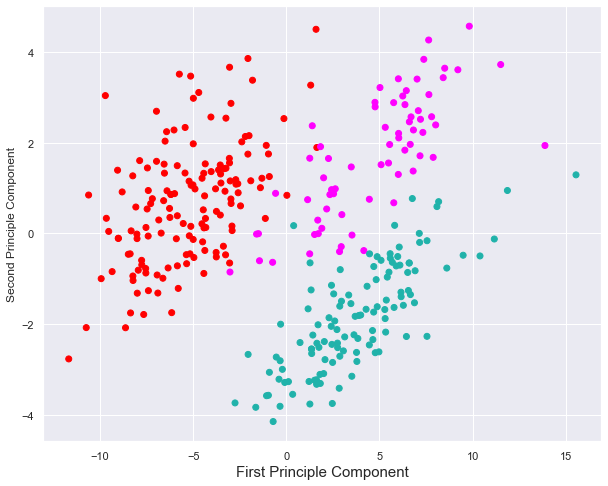

In [153]:

def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Chinstrap":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

# PreProcessing 

In [154]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.61431282 0.38568718]
per_var = [61.43 38.57] 



# Screen Plot

Here we are checking the variance percentage.

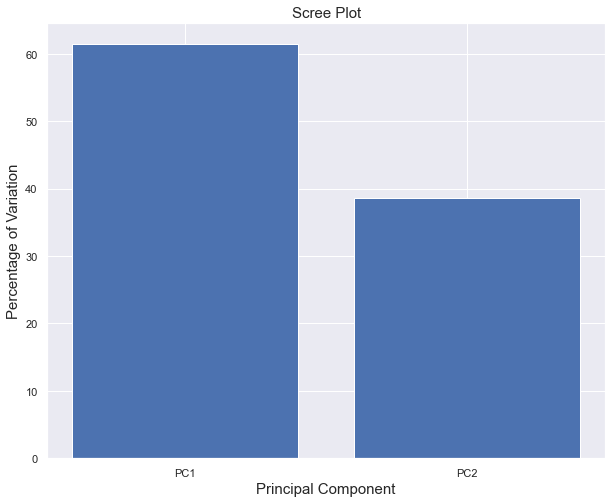

In [155]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,3)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 3), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [156]:
penguins1= penguins[["bill_length_mm", "bill_depth_mm", "species"]]
penguins1 = penguins1.dropna()
penguins1

,bill_length_mm,bill_depth_mm,species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
4,36.7,19.3,Adelie
5,39.3,20.6,Adelie
...,...,...,...
338,47.2,13.7,Gentoo
340,46.8,14.3,Gentoo
341,50.4,15.7,Gentoo
342,45.2,14.8,Gentoo


Call function pca.components_ to see how each PC is obtained as a linear combination of the original coordinates



In [157]:
features = list(set(penguins1.columns) - {"species"})

pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2
bill_depth_mm,-0.707107,0.707107
bill_length_mm,0.707107,0.707107


W use pca.transform to see how our data looks like in the new coordinate system

This will be used later to plot our data in the first two coordinates PC1, PC2

Transform the scaled data and put it in a dataframe.

In [158]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2
0,1.185658,-0.081536
1,0.666358,-0.497240
2,0.778531,-0.177873
3,1.712219,-0.176557
4,1.843032,0.627636
...,...,...
328,-1.661346,-0.830704
329,-1.393777,-0.666732
330,-1.356499,0.302917
331,-1.006775,-0.694117


In [159]:
penguins1["species"]

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [160]:
# we add to the previous table the labels for each flower

projected_df = pd.concat([pca_df, penguins1.species], axis = 1)
projected_df

,PC1,PC2,species
0,1.185658,-0.081536,Adelie
1,0.666358,-0.497240,Adelie
2,0.778531,-0.177873,Adelie
3,1.712219,-0.176557,NaN
4,1.843032,0.627636,Adelie
...,...,...,...
338,NaN,NaN,Gentoo
340,NaN,NaN,Gentoo
341,NaN,NaN,Gentoo
342,NaN,NaN,Gentoo


### Visualization using the first two principal components

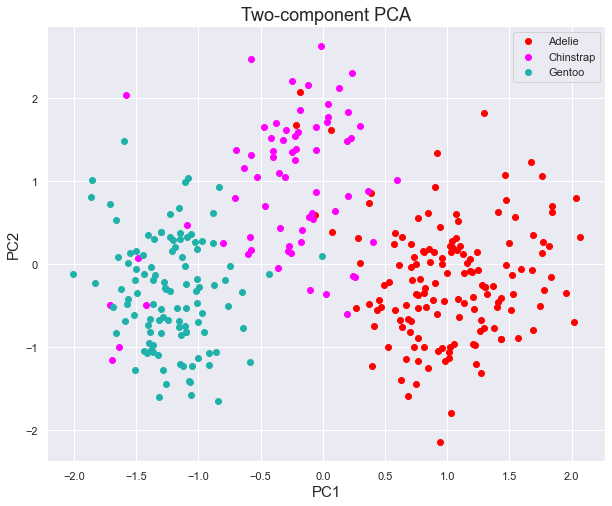

In [161]:
targets = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()